::: {.callout-note title="Colab Link"}

<center>

[![](images/colab-badge.svg)<br>Click here to **open in Colab**](https://colab.research.google.com/drive/1Gucih9aILHt7r7Qklv6xM-EB7Rkoqj6C?usp=sharing){target="_blank"}

</center>

:::

## Is It Fair? The Issue of Operationalization and "Fairness" in AI

## (1) (True and Inferred) Population Parameters

*As an opening disclaimer: recall that we know from statistical theory (e.g., the material that forms the basis of DSAN5100) that, given a population of size $\nu$ ("nu", the Greek version of $n$), even if we conduct smaller samples of size $n \ll \nu$, we can infer fairly accurate estimates of some property of the population, especially as $n \rightarrow \nu$.*

*So, given that framework, and our goal of laying out **operationalization** as clearly as possible, you can keep in mind here that:*

* *The parts of our analysis which look at **drug usage by race** will utilize this **antecedent**, but that*
* *The parts of our analysis which utilize **base rates** of self-reported race will in fact be slightly different: they will be "true" population parameter values, given their provenance from the US Census itself.*

### (1.1) Setting the Table: Inferences from Empirical Survey Data

Studies of drug usage, drawing on a range of anonymized surveys, have slowly started to come up with estimates of population drug usage by self-reported race, which tend to find that the rate of **narcotics usage** is slightly higher for the white population than for the black population in the US (left panel):

![](https://jpj.georgetown.domains/dsan5450-scratch/drug_usage_vs_arrest.jpg)

[Image Source](https://hamiltonbrostg.wpengine.com/publication/economic-fact/twelve-facts-about-incarceration-and-prisoner-reentry/')



### (1.2) Axioms and Antecedents: Race

Mathematically, then, let's start laying out our **axioms** or **antecedents**, that we'll work with in building up **descriptive** definitions of fairness.

Let $\overline{\Pi}$ represent the entire population of the US, so that e.g. $\Pr_{\overline{\Pi}}(E)$ represents the probability that a randomly-chosen person from the population satisfies event $E$. Let $\overline{\mathcal{W}}$ and $\overline{\mathcal{B}}$ represent the white and black populations of the US respectively (recall from e.g. DSAN5100 the use of Greek letters, or at least curly capitalized Latin letters, to represent **population parameters**! And, as for why they have $\overline{\text{overlines}}$ above them, read onwards).

Let's first attempt (and fail) to define a Random Variable $\widetilde{A}$ (short for "Protected **A**ttribute" in this case) representing the race self-reported to the US Census for a randomly-chosen person from the population of the US ($\overline{\Pi}$), such that

$$
\widetilde{A} = \begin{cases}
0 &\text{if Self-Reported White} \\
1 &\text{if Self-Reported Black}
\end{cases}
$$

Why is there a tilde (~) above the $A$ there (and why does this fail to serve as a valid [Random Variable](https://en.wikipedia.org/wiki/Random_variable) as defined in probability theory)? Because, before we can even get off the ground, we have to have the **background knowledge** that individuals responding to the Census' questions can list **more than one race**: there are many individuals in the US for whom the event $\widetilde{A} = 0$ and $\widetilde{A} = 1$ both occur if they happen to be the randomly-chosen person. Thus, since Random Variables are by definition:

* **Functions** which map
* [**Outcomes**](https://en.wikipedia.org/wiki/Outcome_(probability)) from a sample space (which are by definition mutually-exclusive, since the set of possible outcomes forms a **partition** of the sample space $\Omega$) to
* **Values** in $\mathbb{R}$,

$\widetilde{A}$ is straightforwardly not a valid Random Variable---the conditions of the [Kolmogorov axioms](https://en.wikipedia.org/wiki/Probability_axioms), which enable expressions in probability theory to be "true" in the same way that the [ZFC axioms](https://mathworld.wolfram.com/Zermelo-FraenkelAxioms.html) enable $1 + 1 = 2$ to be "true", do not permit non-mutually-exclusive outcomes.

So, if we simply ignore this fact and "jump" directly to white vs. black in the way that this is usually done---a jump that, admittedly, we made ourselves in Question 4 of HW1---this should trigger a "red flag" in your mind, with respect to the question from the **Operationalization** slides about, "is this variable really measuring what it says it is measuring?"

To address this issue, at minimum, we'll need to define **two** Random Variables $B$ and $W$, such that

$$
\begin{align*}
B &= \begin{cases}
0 &\text{if Did Not Self-Report Black} \\
1 &\text{if Self-Reported Black}
\end{cases} \\
W &= \begin{cases}
0 &\text{if Did Not Self-Report White} \\
1 &\text{if Self-Reported White}
\end{cases}
\end{align*}
$$

So that now $B = 1$ and $W = 1$ can both be true for an individual, which does not violate any Kolmogorov axioms!

Then, we can read more into the methodology that the Hamilton Project/Brookings study cited above uses, to find that they

* (a) Split individuals in the dataset into several racial groups on the basis of **one-reported-race only** responses, and then
* (b) Only computed rates of drug use for the one-reported-race respondents who reported either **black** or **white**.

So, solely for the (descriptive) purpose of **matching** their provided data on drug usage with **base rate** information from the Census (see below), we'll now define a **non-tilde** version of $A$ which is what the two bars in the above plots really represent. Letting

$$
S = \begin{cases}
0 &\text{if Multiple Self-Reported Races} \\
1 &\text{if Single Self-Reported Race}
\end{cases}
$$

we can now handle the first bullet point by defining a **new sub-population** $\Sigma \subset \overline{\Pi}$ consisting of all Census respondents who self-reported only one race, i.e., all Census respondents in $\overline{\Pi}$ for whom $S = 1$.

But, to handle the *second* bullet point, we need to define a second sub-population $\Pi \subset \Sigma \subset \overline{\Pi}$, of those individuals in $\Sigma$ for whom $W = 1$ or $B = 1$.

It is with respect to **this** second sub-population $\Pi$ that we can now finally define a valid binary Random Variable $A$ as

$$
A = \begin{cases}
0 &\text{if }W = 1 \\
1 &\text{if }B = 1
\end{cases}
$$

where we need to keep in mind that $A$ is **only well-defined** with respect to $\Pi \subset \Sigma \subset \overline{\Pi}$.

Now, as the Hamilton Institute/Brookings study (and many many, probably most, studies of race in the US) defines it implicitly, we can therefore be more explicit here that we are:

* Mapping $A = 0$ to the term "White" and
* Mapping $A = 1$ to the term "Black".

Correspondingly, we can map:

* The **set** of individuals in $\Sigma$ for whom $A = 0$ to the term "white population" and the symbol $\mathcal{W}$ (mirroring the $\overline{\mathcal{W}}$ from earlier) and
* The **set** of individuals in $\Sigma$ for whom $A = 1$ to the term "black population" and the symbol $\mathcal{B}$ (mirroring the $\overline{\mathcal{B}}$ from earlier)

I will drop the scare-quotes on "Black" and "White" in a lot of places going forward, so your job is to **insert them in your mind** when you read the two non-scare-quoted words! I understand if that strikes you as pedantic at first, but please keep in mind the goal of **transparency** and **reproducibility** in science (those aren't even from this class, they're from the core DSAN5000 class, week 1!): the point is to enable people who are (*rightfully*) skeptical about data scientists studying race to at least be able to scroll up here and uncover *some* of the layers of assumptions undergirding our **operationalization** of "race" here.

### (1.3) Axioms and Antecedents: Drug Usage

Now, to characterize the **height** of the bar plotted in the figure's left panel (as opposed to the split of the population into two separate bars), we need to define $D$ as a Random Variable (short for "**D**rugs" in this case) representing the drug use of a randomly-chosen person from $\Pi$, such that

$$
D = \begin{cases}
0 &\text{if Doesn't Use Drugs} \\
1 &\text{if Uses Drugs}
\end{cases}
$$

And now we can represent the two bar heights, the two population-level parameters, as:

$$
\begin{align*}
\mathbb{E}[D \mid A = 0] = \Pr(D = 1 \mid A = 0) &\approx 0.18 \\
\mathbb{E}[D \mid A = 1] = \Pr(D = 1 \mid A = 1) &\approx 0.16
\end{align*}
$$

Where the expectation and probability measures are equal in this case because the Random Variable $D$ is **binary** (0/1)<sup>[1]</sup>.

Notice how, there are **implementation** factors coming into play in moving from this information towards the Fairness in AI material below, since we have a somewhat weird case of something (drug use) that we can infer at the population level despite **not** being able to easily observe it at the individual level. In other words, to move to the next "step" from this one, we're already pushing a lot of stuff-from-weeks-1-and-2 (for example, the ethics of elicitation of sensitive data---an individual is not going to be as forthcoming in their illegal drug usage as they would be their eye color).

---

1.  This is a straightforward probability-using-binary-RVs theorem, not something specific to 5450, but I think it can help to re-state it early on here: that if $X$ is a binary 0/1 Random Variable, then the definition of **expectation** of a RV gives us:

$$
\mathbb{E}[X] \overset{\text{def}}{=} \sum_{v_X \in \mathcal{R}_X}v_X \cdot \Pr(X = v_X) = 0 \cdot \Pr(X = 0) + 1 \cdot \Pr(X = 1) = \Pr(X = 1)
$$

### (1.4) Population Base Rates

Although the **population-level** data above is technically available for use by researchers, on its own it doesn't help very much for researchers working with ML-based classifiers for example, since it basically represents a dataset with $N = 2$ observations:

In [ ]:
import pandas as pd
pop_df = pd.DataFrame({'quote_unquote_race': [0, 1], 'prop_uses_drugs': [0.16, 0.18]})
pop_df

,quote_unquote_race,prop_uses_drugs
0,0,0.16
1,1,0.18


To even get started in terms of being able to use this data to evaluate fairness, we need to also know the **base rates** of the two subgroups $\mathcal{B}$ and $\mathcal{W}$ with respect to their combined population $\Sigma$. For example, [Chapter 3](https://fairmlbook.org/classification.html) of Barocas et al. (2024) builds its description of fairness in AI around classification as the problem of determining (predicting) values of $y$ for given values of $x$, rooted in **jointly distributed** Random Variables $X$ and $Y$, with a particular collected dataset viewed as samples from

> a probability distribution over pairs of values $(x,y)$ that the random variables $(X,Y)$ might take on.

In our case, notice how we currently only have the two **conditional** expectations written above, **not** a full joint distribution of $D$ and $A$. So, we should be able to identify the missing piece by writing out the **joint** distribution as a function of **conditional** and **marginal** distributions (in prob/stats textbooks, this is usually introduced as the **definition** of conditional probability):

$$
\Pr(D \mid A) = \frac{\Pr(D, A)}{\Pr(A)} \implies \Pr(D, A) = \underbrace{\Pr(D \mid A)}_{\text{We have this}}\underbrace{\Pr(A)}_{\text{We don't have this}}
$$

So, we have to go out and **find** the missing term $\Pr(A)$. Thankfully for this case, the US Census Bureau's job is to take censuses of the self-reported race of the US population. Less thankfully, these are reported with respect to $\overline{\Pi}$, *not* $\Pi$, so we'll need to re-normalize.

You can find the Census population percentages [here](https://www.census.gov/quickfacts/fact/table/US/RHI225223#RHI225223), which tell us that:

* The "White alone" percentage $\Pr_{\overline{\Pi}}(W = 1, S = 1)$ is 0.753,
* The "Black alone" percentage $\Pr_{\overline{\Pi}}(B = 1, S = 1)$ is 0.137, and
* The percentage reporting two or more races $\Pr_{\overline{\Pi}}(S = 0)$ is 0.031

First, since the Census provides $\Pr_{\overline{\Pi}}(S = 0)$, but the Hamilton/Brookings study's population is those for whom $S = 1$, we'll need to use the Kolmogorov axioms to derive

$$
\textstyle
\Pr_{\overline{\Pi}}(S = 1) = 1 - \Pr_{\overline{\Pi}}(S = 0) = 0.969.
$$

From this quantity we can derive

$$
\begin{align*}
\textstyle \Pr_{\overline{\Pi}}(W = 1 \mid S = 1) &= \frac{\Pr_{\overline{\Pi}}(W = 1, S = 1)}{\Pr_{\overline{\Pi}}(S = 1)} = \frac{0.753}{0.969} \approx 0.777 \\
\textstyle \Pr_{\overline{\Pi}}(B = 1 \mid S = 1) &= \frac{\Pr_{\overline{\Pi}}(B = 1, S = 1)}{\Pr_{\overline{\Pi}}(S = 1)} = \frac{0.137}{0.969} \approx 0.141 \\
\end{align*}
$$

therefore giving us (by the way we defined $\Sigma$ above):

$$
\begin{align*}
\textstyle \Pr_{\Sigma}(W = 1) &= 0.777 \\
\textstyle \Pr_{\Sigma}(B = 1) &= 0.141
\end{align*}
$$

and finally, by the way we defined $\Pi$ (where, since this is our target population, the one we'd like to use for the remainder of the demo, we define $\Pr_{\Pi}(E) \equiv \Pr(E)$),

$$
\begin{align*}
\Pr(A = 0) &= \frac{\Pr_{\Sigma}(W = 1)}{\Pr_{\Sigma}(W = 1 \vee B = 1)} = \frac{0.777}{0.777 + 0.141} \approx 0.846 \\
\Pr(A = 1) &= \frac{\Pr_{\Sigma}(B = 1)}{\Pr_{\Sigma}(W = 1 \vee B = 1)} = \frac{0.141}{0.777 + 0.141} \approx 0.154
\end{align*}
$$

### (1.5) Working with the Joint Distribution

Now that we have the missing piece allowing us to fully characterize the **joint distribution**, we can (finally) start deriving a few of the non-immediately-obvious implications from the data we have. For example:

**The probability of being a drug user**

$$
\begin{align*}
\Pr(D = 1) &= \Pr(D = 1, A = 0) + \Pr(D = 1, A = 1) \\
&= \Pr(D = 1 \mid A = 0)\Pr(A = 0) + \Pr(D = 1 \mid A = 1)\Pr(A = 1) \\
&= (0.18)(0.846) + (0.16)(0.154) \approx 0.177
\end{align*}
$$

**The probability of being a non-drug user** (a sanity check to make sure our probabilities satisfy Kolmogorov axioms)

$$
\begin{align*}
\Pr(D = 0) &= \Pr(D = 0, A = 0) + \Pr(D = 0, A = 1) \\
&= \Pr(D = 0 \mid A = 0)\Pr(A = 0) + \Pr(D = 0 \mid A = 1)\Pr(A = 1) \\
&= (0.82)(0.846) + (0.84)(0.154) \approx 0.823
\end{align*}
$$

**The probability that someone is black given that they are a drug user**

$$
\begin{align*}
\Pr(A = 1 \mid D = 1) &\overset{\text{Bayes}}{\underset{\text{Thm}}{=}} \frac{\Pr(D = 1 \mid A = 1)\Pr(A = 1)}{\Pr(D = 1)} = \frac{(0.16)(0.154)}{0.177} \\
&\approx 0.139
\end{align*}
$$

**The probability that someone is white given that they are a drug user**

$$
\begin{align*}
\Pr(A = 0 \mid D = 1) &\overset{\text{Bayes}}{\underset{\text{Thm}}{=}} \frac{\Pr(D = 1 \mid A = 0)\Pr(A = 0)}{\Pr(D = 1)} = \frac{(0.18)(0.846)}{0.177} \\
&\approx 0.860
\end{align*}
$$

And, more generally, we can write out the entire **joint distribution** in a table like

| | $D = 0$ | $D = 1$ |
| - | - | - |
| $A = 0$ | $\Pr(A = 0, D = 0)$ | $\Pr(A = 0, D = 1)$ |
| $A = 1$ | $\Pr(A = 1, D = 0)$ | $\Pr(A = 1, D = 1)$ |

Which we compute using Python here to save time (though in general the types of calculations above are fair game for assignments / exams!)

In [ ]:
import numpy as np
pA0 = 0.846
pA1 = 1 - pA0 # Hooray for mantissas (...mantissae? mantissi?)
pD1_given_A0 = 0.18
pD0_given_A0 = 1 - pD1_given_A0
pD1_given_A1 = 0.16
pD0_given_A1 = 1 - pD1_given_A1

# Joint probabilities
pD1_A0 = pD1_given_A0 * pA0
print(pD1_A0)
pD1_A1 = pD1_given_A1 * pA1
print(pD1_A1)
pD0_A0 = pD0_given_A0 * pA0
print(pD0_A0)
pD0_A1 = pD0_given_A1 * pA1
print(pD0_A1)

joint_dist = np.array([
    [pD0_A0, pD1_A0],
    [pD0_A1, pD1_A1]
])
print(joint_dist)

print(np.sum(joint_dist))
print(pD0_A0 + pD0_A1 + pD1_A0 + pD1_A1) # Coolio


0.15228
0.024640000000000006
0.69372
0.12936000000000003
[[0.69372 0.15228]
 [0.12936 0.02464]]
1.0
1.0


## (2) Making *Predictions* Related to This Data

Now, moving from 5100-esque to 5450-specific topics, let's think about a **decision-making system** which utilizes surveillance cameras installed around a given neighborhood. This system aims to identify people's faces using these cameras and then, on the basis of a given person $i$'s facial image features $X_i$, **classify** them into one of two classes:

$$
\widehat{D}_i = \begin{cases}
0 &\text{if }i\textbf{ Not}\text{ a Predicted Drug User} \\
1 &\text{if }i\textbf{ Is}\text{ a Predicted Drug User}
\end{cases}
$$

It turns out that, given the descriptive (and context-free) definitions of fairness at the core of the Fairness in AI literature, we have almost everything that we need, besides a **loss function**.

Using a slightly different notation than the one we use in e.g. DSAN 5300 (we can convert between the two notations if need be!), in a fairness context the loss is often parameterized with respect to a given **true label value** $y$ and a given **prediction** for that label $\widehat{y}$: $L(\widehat{y}, y)$ tells us the "badness" of predicting a value $\widehat{y}$ when the true value that we were trying to predict is $y$.

One standard loss function, used by pretty much any binary classifier (say, those in scikit-learn) unless the default settings are modified, is the **misclassification loss**:

$$
L(0, 0) = 0, L(0, 1) = 1, L(1, 0) = 1, L(1, 1) = 0
$$

This loss function assigns a "badness" of 1 when the prediction was incorrect, and a "badness" of 0 when the prediction was correct, so that it can be condensed even more using the indicator function $\mathbb{1}$ into just:

$$
L(\widehat{y}, y) = \mathbb{1}[\widehat{y} \neq y].
$$

We can also represent this loss function in a form that resembles a **confusion matrix** (which we'll use a lot from now on!), keeping in mind that it's just the same **form** as a confusion matrix, not a confusion matrix itself:

| | $\widehat{D}_i = 0$ | $\widehat{D}_i = 1$ |
| - | - | - |
| $D = 0$ | 0 | 1 |
| $D = 1$ | 1 | 0 |

### (2.1) Fairness Definition 1: Statistical Parity

Statistical Independence is satisfied if

$$
\Pr(\widehat{D} = 1 \mid A = 0) = \Pr(\widehat{D} = 1 \mid A = 1)
$$

So, let's see how/whether this fairness definition "matches up with" our intuitions around fairness!

First, let's construct a "population" of size $\nu = 1000$ (since our estimates only go to 3 decimal places max), using the joint distribution derived above, that we can sample from (though, for our purposes here, our "sample" will in fact be the entire population, so that $N = \nu = 1000$):

### (2.2) Constructing a Simulated Population

In [ ]:
import pandas as pd
nu = 1000
pop_df = pd.DataFrame({'A': [0]*nu, 'D': [0]*nu})
pop_df.head()

,A,D
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
print(nu * joint_dist)

[[693.72 152.28]
 [129.36  24.64]]


In [ ]:
D0_A0_df = pd.DataFrame([{'D': 0, 'A': 0}] * 694) # dist[0,0]
D0_A1_df = pd.DataFrame([{'D': 0, 'A': 1}] * 129) # dist[1,0]
D1_A0_df = pd.DataFrame([{'D': 1, 'A': 0}] * 152) # dist[0,1]
D1_A1_df = pd.DataFrame([{'D': 1, 'A': 1}] * 25) # dist[1,1]
pop_df = pd.concat([D0_A0_df, D0_A1_df, D1_A0_df, D1_A1_df], axis=0, ignore_index=True)
pop_df

,D,A
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,1,1
996,1,1
997,1,1
998,1,1


In [ ]:
len(pop_df[pop_df['D'] == 1])

177

### (2.3) Adding a Noisy Feature and a Random Feature

Now let's pretend $X_i$ is some noisy measurement of $A_i$, train a classifier to predict $D_i$ from $X_i$, and see if we get "fairness"!

In [ ]:
import numpy as np
rng = np.random.default_rng(seed=5450)
pop_df['X_bin'] = pop_df['A'].apply(lambda x: 1 if x == 1 else -1)
# Random (low chance) flip
pop_df['X_mult'] = rng.choice([1,-1], size=len(pop_df), p=[0.95,0.05])
pop_df['X_result'] = pop_df['X_bin'] * pop_df['X_mult']
pop_df['X_noise'] = rng.normal(0, 0.1, size=len(pop_df))
pop_df['X'] = pop_df['X_result'] + pop_df['X_noise']
pop_df['X_rand'] = rng.normal(0, 0.1, size=len(pop_df))
pop_df

,D,A,X_bin,X_mult,X_result,X_noise,X,X_rand
0,0,0,-1,1,-1,-0.054224,-1.054224,-0.050844
1,0,0,-1,1,-1,-0.239642,-1.239642,0.047055
2,0,0,-1,1,-1,0.067170,-0.932830,-0.010561
3,0,0,-1,-1,1,0.120252,1.120252,-0.092252
4,0,0,-1,1,-1,0.026217,-0.973783,-0.163111
...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,0.072730,1.072730,-0.120465
996,1,1,1,1,1,-0.032165,0.967835,0.013276
997,1,1,1,1,1,-0.070791,0.929209,0.006057
998,1,1,1,1,1,0.060893,1.060893,0.092034


In [ ]:
black_df = pop_df[pop_df['A'] == 1].copy()
black_df['X'].mean()

0.9368364928954515

In [ ]:
black_df['X'].std()

0.37793852152251584

In [ ]:
white_df = pop_df[pop_df['A'] == 0].copy()
white_df['X'].mean()

-0.8899012951427693

In [ ]:
white_df['X'].std()

0.46257415929089934

In [ ]:
pd.crosstab(pop_df['A'], pop_df['D'], margins=True, normalize=True)

D,0,1,All
A,,,
0,0.694,0.152,0.846
1,0.129,0.025,0.154
All,0.823,0.177,1.000


In [ ]:
pd.crosstab(pop_df['A'], pop_df['D'], margins=True, normalize='columns')

D,0,1,All
A,,,
0,0.843256,0.858757,0.846
1,0.156744,0.141243,0.154


In [ ]:
pd.crosstab(pop_df['A'], pop_df['D'], margins=True, normalize='index')

D,0,1
A,,
0,0.820331,0.179669
1,0.837662,0.162338
All,0.823000,0.177000


In [ ]:
pop_df[['A','D','X']].corr()

,A,D,X
A,1.000000,-0.016390,0.825867
D,-0.016390,1.000000,-0.037118
X,0.825867,-0.037118,1.000000


<Axes: xlabel='A', ylabel='X'>

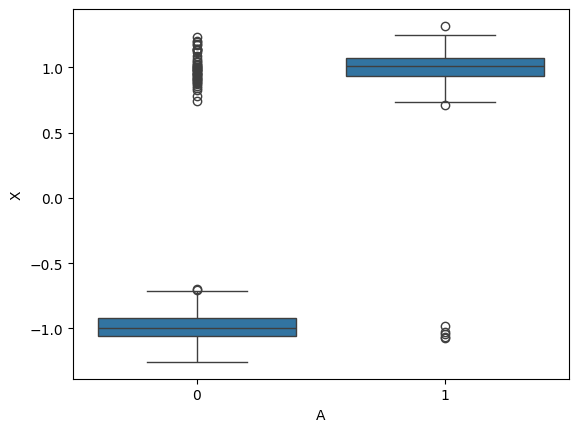

In [ ]:
import seaborn as sns
sns.boxplot(x='A', y='X', data=pop_df)

<Axes: xlabel='X', ylabel='D'>

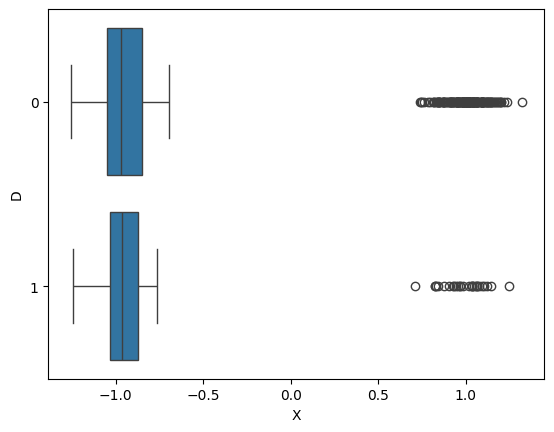

In [ ]:
sns.boxplot(x='X', y='D', orient='h', data=pop_df)

### (2.4) Classify with Scikit-Learn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
#clf = LinearSVC()
#clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic')
clf = LogisticRegression()
#clf = DecisionTreeClassifier(max_depth=1)

In [ ]:
X_df = pop_df[['X','X_rand']].copy()
X_scaled = scaler.fit_transform(X_df)
d_df = pop_df['D'].copy()
X_train, X_test, d_train, d_test = train_test_split(X_scaled, d_df)
clf = clf.fit(X_train, d_train)

In [ ]:
X_train

array([[ 2.01620819, -1.32996031],
       [ 2.2518996 , -0.75840806],
       [ 2.14098014,  0.31504902],
       ...,
       [-0.28251252,  1.00551134],
       [-0.57882442, -0.15290433],
       [ 1.99170214,  0.46089925]])

In [ ]:
X_df.shape, d_df.shape

((1000, 2), (1000,))

In [ ]:
d_test_hat = clf.predict(X_test)

In [ ]:
confusion_matrix(d_test, d_test_hat)

array([[207,   0],
       [ 43,   0]])

In [ ]:
pop_df['D_hat'] = clf.predict(pop_df[['X','X_rand']])
pop_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,D,A,X_bin,X_mult,X_result,X_noise,X,X_rand,D_hat
0,0,0,-1,1,-1,-0.054224,-1.054224,-0.050844,0
1,0,0,-1,1,-1,-0.239642,-1.239642,0.047055,0
2,0,0,-1,1,-1,0.067170,-0.932830,-0.010561,0
3,0,0,-1,-1,1,0.120252,1.120252,-0.092252,0
4,0,0,-1,1,-1,0.026217,-0.973783,-0.163111,0
...,...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,0.072730,1.072730,-0.120465,0
996,1,1,1,1,1,-0.032165,0.967835,0.013276,0
997,1,1,1,1,1,-0.070791,0.929209,0.006057,0
998,1,1,1,1,1,0.060893,1.060893,0.092034,0


In [ ]:
if isinstance(clf, DecisionTreeClassifier):
  plot_tree(clf)

In [ ]:
test_X0 = np.arange(-1, 1, 0.1)
test_Xrand = rng.normal(0, 0.1, size=len(test_X0))
test_Xmat = np.column_stack([test_X0, test_Xrand])
test_Xmat

array([[-1.00000000e+00, -8.21496502e-02],
       [-9.00000000e-01, -1.18804351e-01],
       [-8.00000000e-01, -9.71993639e-02],
       [-7.00000000e-01,  1.79121572e-01],
       [-6.00000000e-01,  7.54615529e-02],
       [-5.00000000e-01, -7.55314281e-02],
       [-4.00000000e-01, -2.14828193e-02],
       [-3.00000000e-01, -5.39771961e-02],
       [-2.00000000e-01, -1.24518105e-01],
       [-1.00000000e-01,  1.15651561e-01],
       [-2.22044605e-16, -1.11209055e-01],
       [ 1.00000000e-01, -1.63469797e-01],
       [ 2.00000000e-01, -4.00110245e-02],
       [ 3.00000000e-01, -8.82016598e-02],
       [ 4.00000000e-01, -2.74525280e-02],
       [ 5.00000000e-01, -5.04958858e-02],
       [ 6.00000000e-01, -3.54260686e-02],
       [ 7.00000000e-01,  4.46857290e-03],
       [ 8.00000000e-01, -1.21658993e-01],
       [ 9.00000000e-01, -3.37236460e-02]])

In [ ]:
clf.predict(test_Xmat)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_Xmat_pred = clf.predict_proba(test_Xmat)
test_Xmat_pred

array([[0.811287  , 0.188713  ],
       [0.81442558, 0.18557442],
       [0.81643575, 0.18356425],
       [0.81365365, 0.18634635],
       [0.81801088, 0.18198912],
       [0.82315069, 0.17684931],
       [0.82450109, 0.17549891],
       [0.82739245, 0.17260755],
       [0.83091462, 0.16908538],
       [0.82894698, 0.17105302],
       [0.83514931, 0.16485069],
       [0.83823475, 0.16176525],
       [0.83832092, 0.16167908],
       [0.84129042, 0.15870958],
       [0.84241775, 0.15758225],
       [0.84491479, 0.15508521],
       [0.84676281, 0.15323719],
       [0.84819397, 0.15180603],
       [0.85224427, 0.14775573],
       [0.85288184, 0.14711816]])

In [ ]:
test_d_prob = test_Xmat_pred[:,1]
test_d_prob

array([0.188713  , 0.18557442, 0.18356425, 0.18634635, 0.18198912,
       0.17684931, 0.17549891, 0.17260755, 0.16908538, 0.17105302,
       0.16485069, 0.16176525, 0.16167908, 0.15870958, 0.15758225,
       0.15508521, 0.15323719, 0.15180603, 0.14775573, 0.14711816])

In [ ]:
def classify(cur_clf, test_Xmat, d_prob_thresh = 0.17):
  test_Xmat_pred = cur_clf.predict_proba(test_Xmat)
  test_d_prob = test_Xmat_pred[:,1]
  test_d_class = np.where(test_d_prob > d_prob_thresh, 1, 0)
  return test_d_class


In [ ]:
test_d_pred = classify(test_Xmat)
test_d_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_d_true = np.where(test_Xmat[:,0] < 0, 1, 0)
test_d_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#RocCurveDisplay.from_estimator(clf, X_test, d_test, plot_chance_level=True)

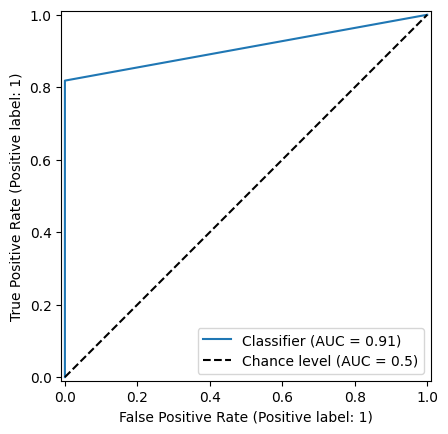

In [ ]:
RocCurveDisplay.from_predictions(test_d_true, test_d_pred, plot_chance_level=True)

In [ ]:
new_samp_df = pop_df.sample(100, random_state=5450)

In [ ]:
new_samp_df

,D,A,X_bin,X_mult,X_result,X_noise,X,X_rand
899,1,0,-1,1,-1,-0.033770,-1.033770,-0.026273
699,0,1,1,1,1,-0.181455,0.818545,-0.023939
481,0,0,-1,1,-1,-0.200307,-1.200307,0.113340
503,0,0,-1,1,-1,0.034218,-0.965782,-0.048357
856,1,0,-1,1,-1,0.103965,-0.896035,0.015975
...,...,...,...,...,...,...,...,...
896,1,0,-1,1,-1,-0.018532,-1.018532,-0.049717
500,0,0,-1,1,-1,0.010933,-0.989067,0.030974
558,0,0,-1,1,-1,-0.001991,-1.001991,-0.110632
414,0,0,-1,1,-1,0.067946,-0.932054,-0.124212


In [ ]:
new_test_Xmat = new_samp_df[['X','X_rand']].copy()


In [ ]:
new_test_preds = classify(new_test_Xmat)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
confusion_matrix(new_test_preds, new_samp_df['D'])

array([[14,  5],
       [63, 18]])

Fairness comes from the confusion matrix using **A** instead of D!

In [ ]:
confusion_matrix(new_test_preds, new_samp_df['A'])

array([[ 8, 11],
       [79,  2]])

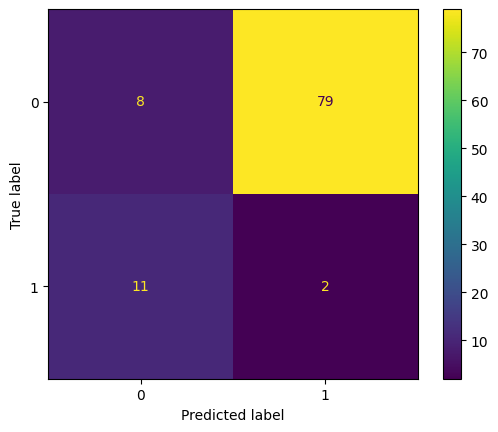

In [ ]:
ConfusionMatrixDisplay.from_predictions(new_samp_df['A'], new_test_preds) #, display_labels=['not_drug_user','drug_user'])

In [ ]:
confusion_matrix(new_samp_df['A'], new_test_preds, normalize='true')

array([[0.09195402, 0.90804598],
       [0.84615385, 0.15384615]])

## (3) Same Thing But With *Arrest* Rates...

Now, if we re-do everything above but with drug usage rates **operationalized** using **arrest rates**, we instead have

$$
\begin{align*}
\Pr(D = 1 \mid A = 0) &= 0.0040 \\
\Pr(D = 1 \mid A = 1) &= 0.0105
\end{align*}
$$

In [ ]:
def gen_noisy_feature(pop_race_vec):
  X_bin = pop_df['A'].apply(lambda x: 1 if x == 1 else -1)
  # Random (low chance) flip
  X_mult = rng.choice([1,-1], size=len(pop_race_vec), p=[0.95,0.05])
  X_result = X_bin * X_mult
  X_noise = rng.normal(0, 0.1, size=len(pop_df))
  X_final = X_result + X_noise
  return X_final

def gen_random_feature(pop_race_vec):
  X_rand = rng.normal(0, 0.1, size=len(pop_race_vec))
  return X_rand

def classify(test_Xmat, d_prob_thresh = 0.17):
  test_Xmat_pred = clf.predict_proba(test_Xmat)
  test_d_prob = test_Xmat_pred[:,1]
  test_d_class = np.where(test_d_prob > d_prob_thresh, 1, 0)
  return test_d_class

def construct_population(pD1_given_A0, pD1_given_A1, nu=1000):
  pA0 = 0.846
  pA1 = 1 - pA0
  pD0_given_A0 = 1 - pD1_given_A0
  pD0_given_A1 = 1 - pD1_given_A1
  # Joint probabilities
  pD1_A0 = pD1_given_A0 * pA0
  #print(pD1_A0)
  pD1_A1 = pD1_given_A1 * pA1
  #print(pD1_A1)
  pD0_A0 = pD0_given_A0 * pA0
  #print(pD0_A0)
  pD0_A1 = pD0_given_A1 * pA1
  #print(pD0_A1)
  joint_dist = np.array([
      [pD0_A0, pD1_A0],
      [pD0_A1, pD1_A1]
  ])
  print(joint_dist)
  nu = 1000
  pop_df = pd.DataFrame({'A': [0]*nu, 'D': [0]*nu})
  joint_freqs = nu * joint_dist
  D0_A0_df = pd.DataFrame([{'D': 0, 'A': 0}] * round(joint_freqs[0,0]))
  D0_A1_df = pd.DataFrame([{'D': 0, 'A': 1}] * round(joint_freqs[1,0]))
  D1_A0_df = pd.DataFrame([{'D': 1, 'A': 0}] * round(joint_freqs[0,1]))
  D1_A1_df = pd.DataFrame([{'D': 1, 'A': 1}] * round(joint_freqs[1,1]))
  pop_df = pd.concat([D0_A0_df, D0_A1_df, D1_A0_df, D1_A1_df], axis=0, ignore_index=True)
  #display(pop_df)
  pop_df['X0'] = gen_noisy_feature(pop_df['A'])
  pop_df['X1'] = gen_random_feature(pop_df['A'])
  return pop_df

arrest_df = construct_population(0.0040, 0.0105)
display(arrest_df)


[[0.842616 0.003384]
 [0.152383 0.001617]]


,D,A,X0,X1
0,0,0,-0.971645,-0.024211
1,0,0,-1.176896,0.039959
2,0,0,-1.008070,-0.026912
3,0,0,-0.999462,0.021601
4,0,0,-0.944086,-0.149199
...,...,...,...,...
995,1,0,0.925104,-0.033928
996,1,0,1.013372,-0.130119
997,1,0,0.898179,0.108746
998,1,1,0.887125,-0.123374


In [ ]:
# Classify
def thresh_classify(cur_clf, test_Xmat, d_prob_thresh = 0.17):
  test_Xmat_pred = cur_clf.predict_proba(test_Xmat)
  test_d_prob = test_Xmat_pred[:,1]
  test_d_class = np.where(test_d_prob > d_prob_thresh, 1, 0)
  return test_d_class

pop_clf = LogisticRegression()
X_pop = arrest_df[['X0','X1']].copy()
d_pop = arrest_df['D'].copy()
pop_clf.fit(X_pop, d_pop)
optimal_pr_d_hat = thresh_classify(pop_clf, X_pop, 0.5)
fair_pr_d_hat = thresh_classify(pop_clf, X_pop, 0.03)
unfair_pr_d_hat = thresh_classify(pop_clf, X_pop, 0.025)

In [ ]:
def display_confusion(race_vec, classification_vec):
  return ConfusionMatrixDisplay.from_predictions(race_vec, classification_vec) #, display_labels=['not_drug_user','drug_user'])

def display_confusion_normalized(race_vec, classification_vec):
  return ConfusionMatrixDisplay.from_predictions(race_vec, classification_vec, normalize='true') #, display_labels=['not_drug_user','drug_user'])


For **optimal** classifier:

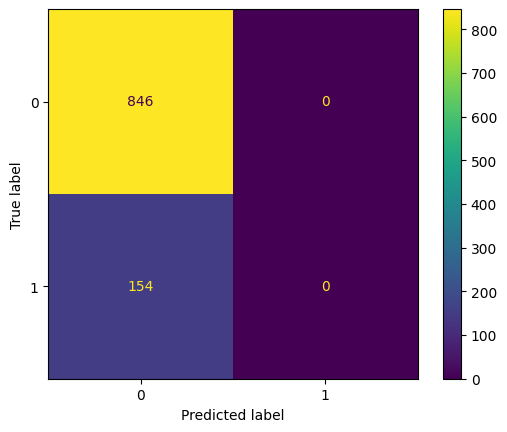

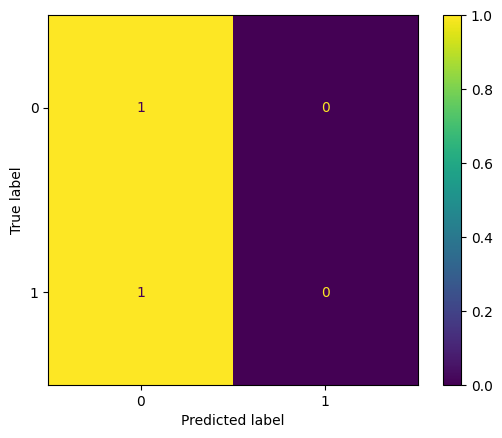

In [ ]:
display_confusion(arrest_df['A'], optimal_pr_d_hat)
display_confusion_normalized(arrest_df['A'], optimal_pr_d_hat)

For **effective threshold** classifier:

0.002364066193853428
0.993


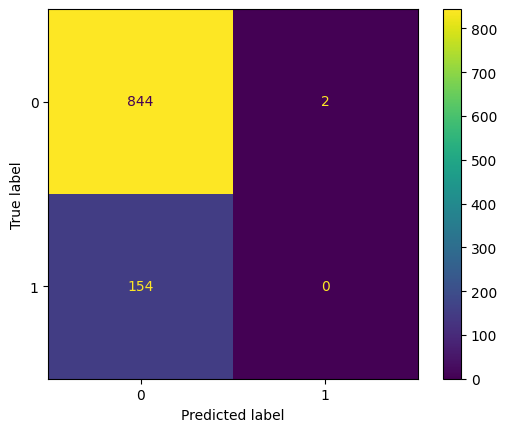

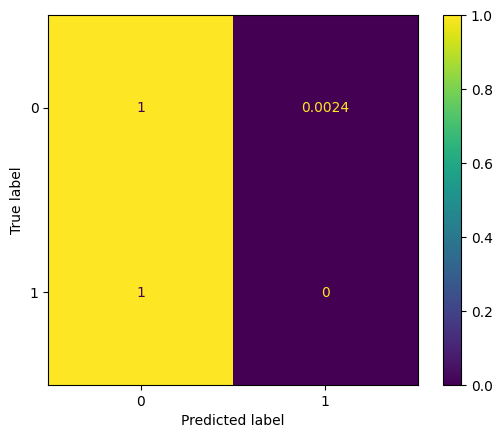

In [ ]:
display_confusion(arrest_df['A'], fair_pr_d_hat)
display_confusion_normalized(arrest_df['A'], fair_pr_d_hat)

def compute_unfairness(race_vec, d_hat):
  cmat = confusion_matrix(race_vec, d_hat, normalize='true')
  pr_DH1_A0 = cmat[0,1]
  pr_DH1_A1 = cmat[1,1]
  return abs(pr_DH1_A1 - pr_DH1_A0)

def compute_accuracy(d_vec, d_hat):
  cmat = confusion_matrix(d_vec, d_hat, normalize='all')
  pr_DH0_H0 = cmat[0,0]
  pr_DH1_H1 = cmat[1,1]
  return pr_DH0_H0 + pr_DH1_H1

print(compute_unfairness(arrest_df['A'], fair_pr_d_hat))
print(compute_accuracy(arrest_df['D'], fair_pr_d_hat))


In [ ]:
thresh_vals_macro = np.arange(0, 0.04, 0.0001)
def gen_unfairness_curve(thresh_vals):
  unfairness_data = []

  for cur_thresh in thresh_vals:
    cur_pr_d_hat = thresh_classify(pop_clf, X_pop, cur_thresh)
    cur_unfairness = compute_unfairness(arrest_df['A'], cur_pr_d_hat)
    cur_accuracy = compute_accuracy(arrest_df['D'], cur_pr_d_hat)
    cur_data = {
        'thresh': cur_thresh,
        'unfairness': 10*cur_unfairness,
        'accuracy': cur_accuracy,
    }
    unfairness_data.append(cur_data)
  unfairness_df = pd.DataFrame(unfairness_data)
  return unfairness_df

unfairness_macro_df = gen_unfairness_curve(thresh_vals_macro)


In [ ]:
unfairness_macro_df

,thresh,unfairness,accuracy
0,0.0000,0.0,0.005
1,0.0001,0.0,0.005
2,0.0002,0.0,0.005
3,0.0003,0.0,0.005
4,0.0004,0.0,0.005
...,...,...,...
395,0.0395,0.0,0.995
396,0.0396,0.0,0.995
397,0.0397,0.0,0.995
398,0.0398,0.0,0.995


<Axes: xlabel='thresh'>

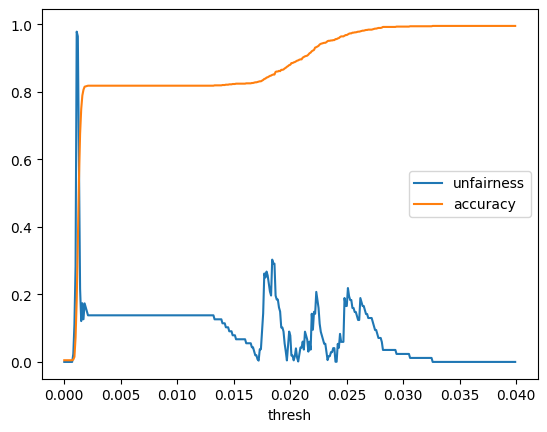

In [ ]:
unfairness_macro_df.plot(x='thresh', y=['unfairness','accuracy'])

<Axes: xlabel='thresh'>

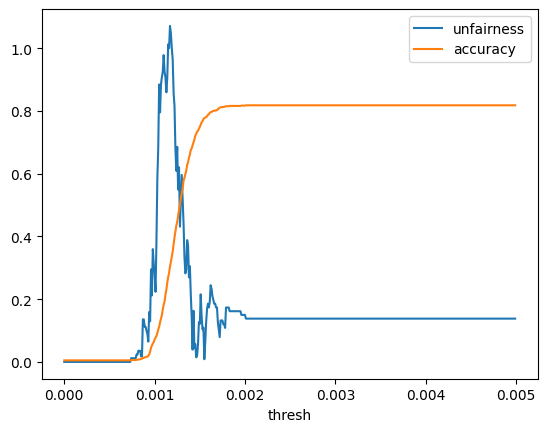

In [ ]:
thresh_vals_micro = np.arange(0, 0.005, 0.00001)
unfairness_micro_df = gen_unfairness_curve(thresh_vals_micro)
unfairness_micro_df.plot(x='thresh', y=['unfairness','accuracy'])

## (4) Predictive Parity: A Slightly Less Arbitrary, But Slightly More Problematic(?) Fairness Definition

[Building on Statistical Parity](http://fairware.cs.umass.edu/papers/Verma.pdf), Predictive Parity incorporates the actual accuracy of the predictions, requiring only that the rate of **correct** predictions is equal for $A = 0$ and $A = 1$:

$$
\Pr(D = 1 \mid \widehat{D} = 1, A = 0) = \Pr(D = 1 \mid \widehat{D} = 1, A = 1)
$$

## (5) Calibration: The Least Bamboozling of the Context-Free Fairness Measures

For any given estimation "score" $s(X)$ used by the algorithm as a proxy for estimating $\widehat{\Pr}(D = 1)$<sup>[2]</sup>, which in turns gets used (e.g., via thresholding) to generate a final **prediction** $\widehat{D}$, the probability of using drugs $\Pr(D = 1)$ is equal for $A = 0$ and $A = 1$:

$$
\Pr(D = 1 \mid s(X) = s, A = 0) = \Pr(D = 1 \mid s(X) = s, A = 1), \; \forall s \in [0, 1]
$$

This measure is the least bamboozling in the sense that it directly **addresses** the underlying "risk scores" which, if a given machine learning algorithm does not directly compute itself, can at least be *inferred* by treating the algorithm like a "black box".

---

2. This notation is used mainly just to emphasize how $s(X) \in [0, 1]$ is used by the algorithm to generate *estimates* of the true probability $\Pr(D = 1)$/